In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches

from skimage import data

# Import Cascade of classifiers and gaussian filter
from skimage.feature import Cascade
from skimage.filters import gaussian

In [2]:
def show_image(image, title='image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def getFace(d):
    ''' Extracts the face rectangle from the image using the
    coordinates of the detected.'''
    
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    
    # Extract the detected face
    face= image[x:width, y:height]
    return face

In [4]:
def mergeBlurryFace(original, gaussian_image):
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    
    original[x:width, y:height] = gaussian_image
    return original

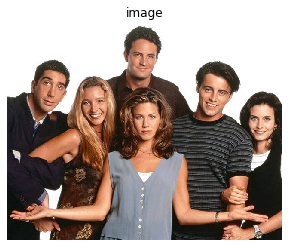

In [5]:
# read image
image = plt.imread('../../data/friends.jpg')

image= image.copy()
show_image(image)

In [6]:
# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

# Detect the faces
detected = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2, step_ratio=1,
                                       min_size=(50, 50), max_size=(100, 100))

# For each detected face
for d in detected:
    # Obtain the face cropped from detected coordinates
    face = getFace(d)
    
    # Apply gaussian filter to extracted face
    gaussian_face = gaussian(face, multichannel=True, sigma = 10)
    # show_image(gaussian_face)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(image, gaussian_face)

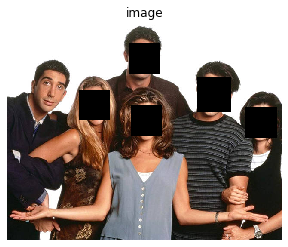

In [7]:
show_image(resulting_image)

In [8]:
# resulting_image